___
# Random Forest Analysis on Titanic dataset

The titanic-dataset is a famous dataset which I found on Kaggle (https://www.kaggle.com/competitions/titanic/overview)

I have made predictions on the survival of passengers. 
I used the "train" dataset to train the random forest, and the "test" dataset to predict.



## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Importing the datasets

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
df_train = train.copy()
df_test = test.copy()

# EDA

Below I inspect the data: I check for missing data and visual trends in both datasets.


In [6]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [8]:
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
df_test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### Missing data remarks
We see here that in the train data there's "age" and "cabin" information missing on a large scale. The heatmap visualizes it. There is a bit of missing data in the "embarked" column.
In the test data we also see the large amounts of missing data for "age" and "cabin". There's also 1 entry missing for "fare". I'll clean the data after the initial exploration.

<Axes: >

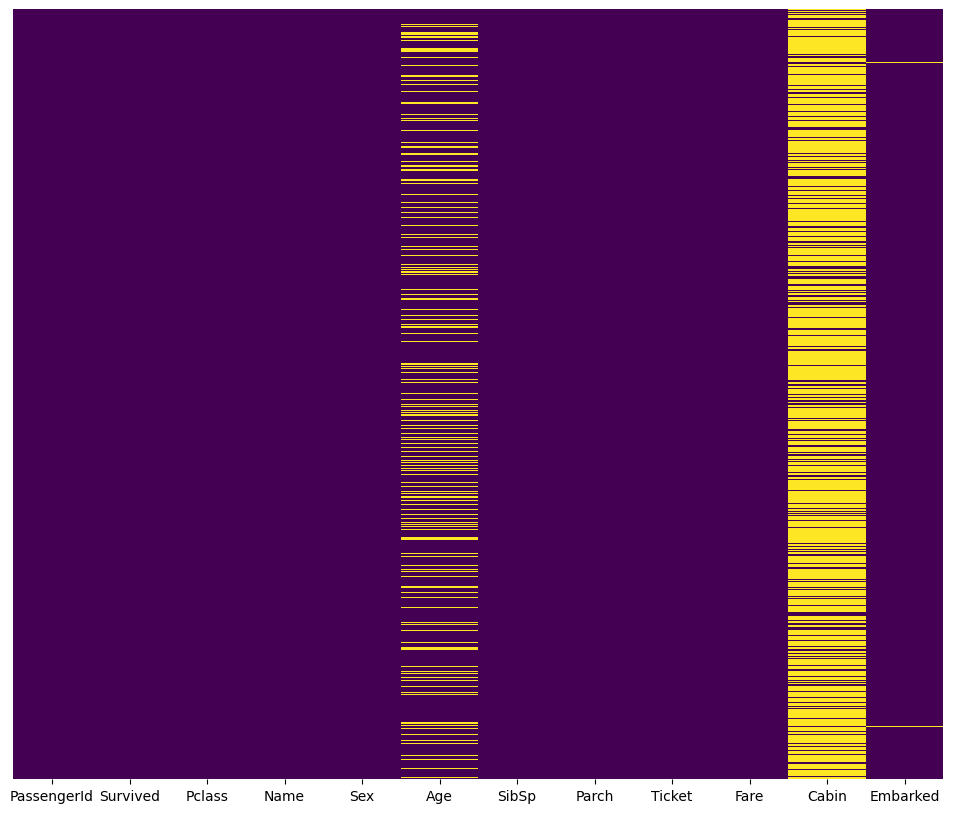

In [10]:
plt.figure(figsize=(12,10))
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<Axes: >

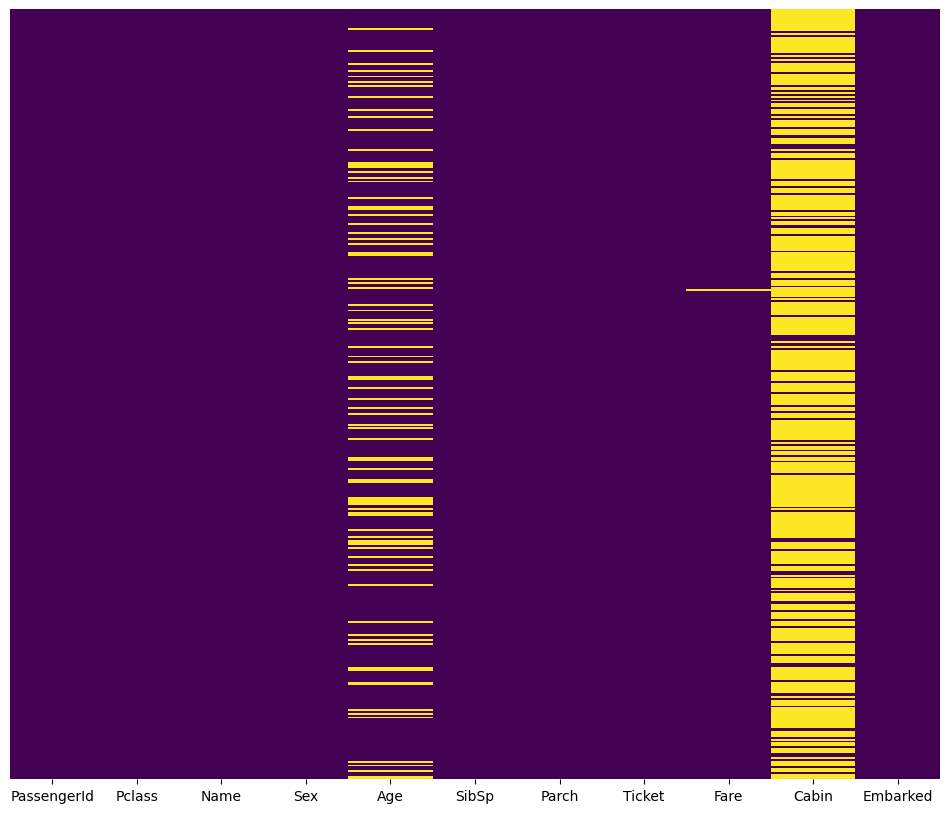

In [11]:
plt.figure(figsize=(12,10))
sns.heatmap(df_test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Below I take a look at the correlations between the numerical columns of the train data to get an idea of possible relations. I also do some basic visualisations with Seaborn to visualize relationships (also to include non-numerical columns, like gender).

Interesting to see that survival visually seems to have a relationship with gender, passenger class, fare and the presence of a sibling, spouse, parent or child in the train data.
Age and passenger class are inversely correlated, which is useful for imputing the missing "age" data.

The overall distributions are also interesting. For example, the distribution of age between passenger class (with age being higher with each class). This is useful later, in dealing with the missing data in the "Age" column.

In [12]:
df_train.corr()

C:\Users\Admin\AppData\Local\Temp\ipykernel_14208\299540020.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_train.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<Axes: xlabel='Survived', ylabel='count'>

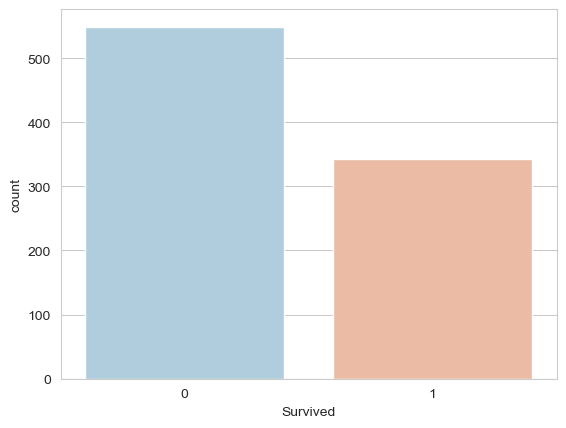

In [13]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=df_train,palette='RdBu_r')

<Axes: xlabel='Survived', ylabel='count'>

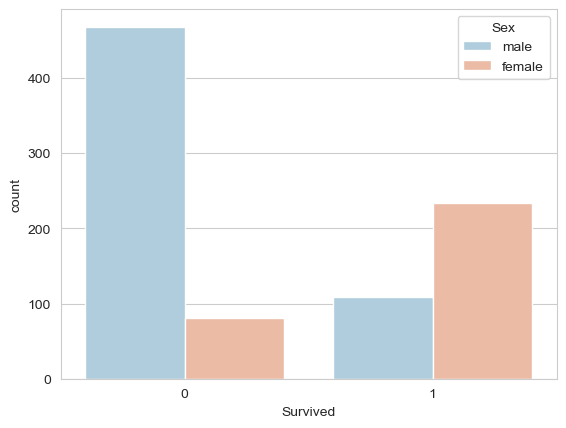

In [14]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=df_train,palette='RdBu_r')

<Axes: xlabel='Survived', ylabel='count'>

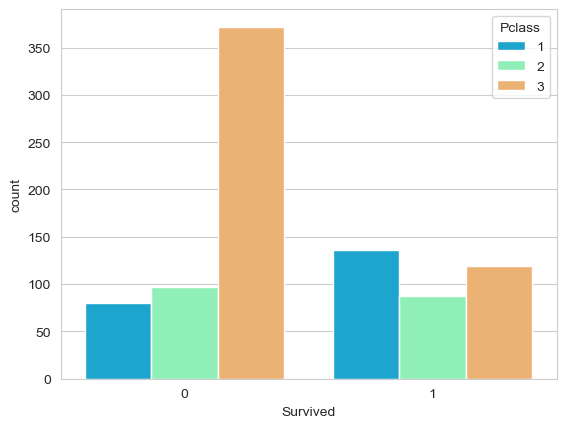

In [15]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=df_train,palette='rainbow')

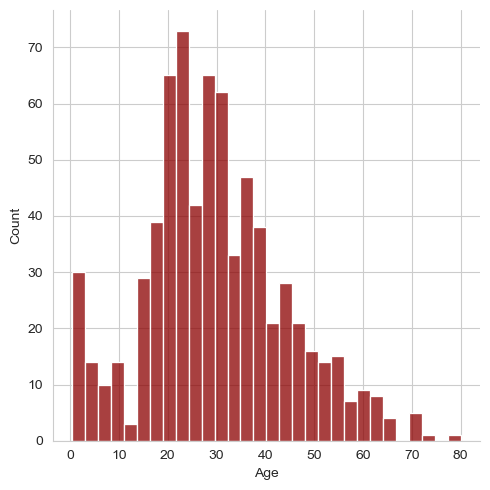

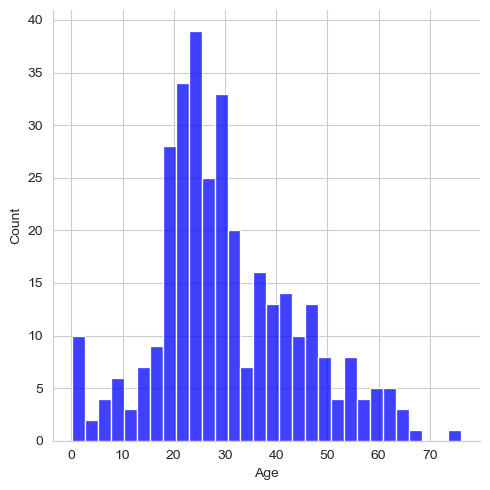

In [16]:
sns.displot(df_train['Age'].dropna(),kde=False,color='darkred',bins=30)
sns.displot(df_test['Age'].dropna(),kde=False,color='blue',bins=30)

<Axes: xlabel='SibSp', ylabel='count'>

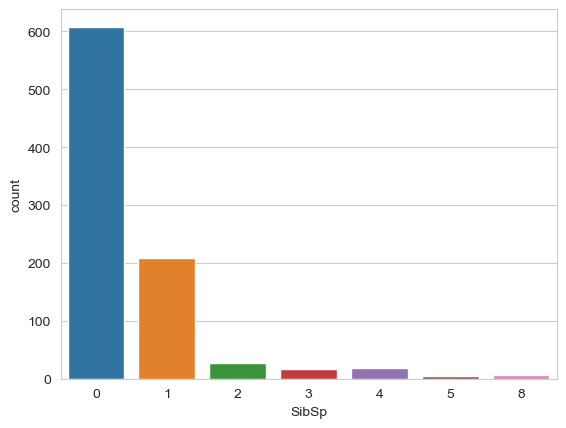

In [17]:
sns.countplot(x='SibSp',data=df_train)

<Axes: xlabel='SibSp', ylabel='count'>

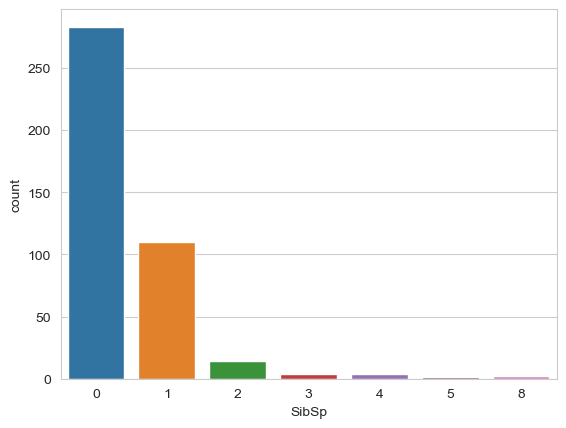

In [18]:
sns.countplot(x='SibSp',data=df_test)

<Axes: xlabel='SibSp', ylabel='count'>

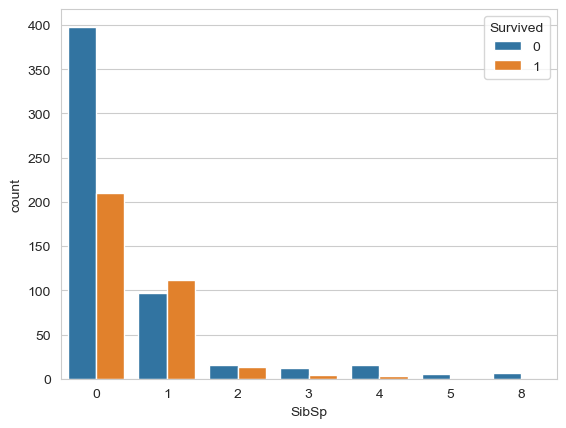

In [19]:
sns.countplot(x='SibSp',data=df_train, hue="Survived")

<Axes: xlabel='Parch', ylabel='count'>

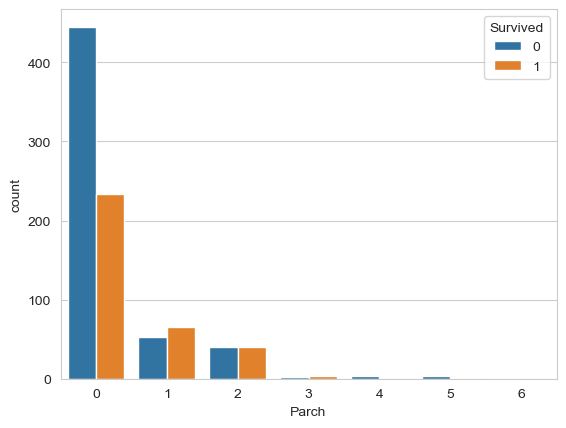

In [20]:
sns.countplot(x='Parch',data=df_train, hue="Survived")

<Axes: xlabel='SibSp', ylabel='count'>

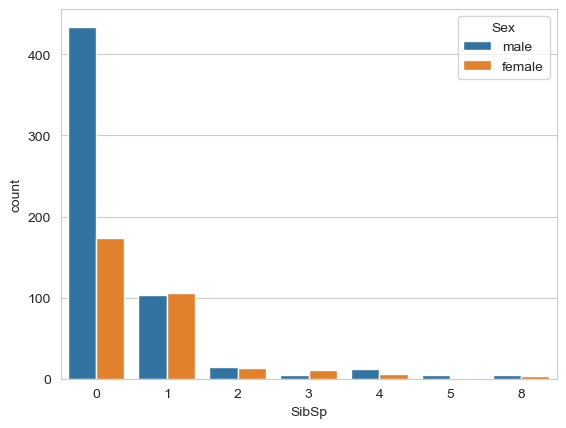

In [21]:
sns.countplot(x='SibSp',data=df_train, hue="Sex")

(0.0, 537.9456599999999)

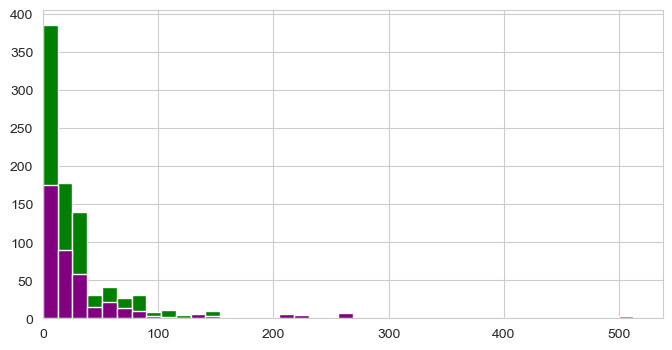

In [22]:
df_train['Fare'].hist(color='green',bins=40,figsize=(8,4))
df_test['Fare'].hist(color='purple',bins=40,figsize=(8,4))
plt.xlim(left=0)

In [23]:
# Who paid so much for a ticket??
df_train[df_train["Fare"] == df_train["Fare"].max()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


<Axes: xlabel='Pclass', ylabel='Age'>

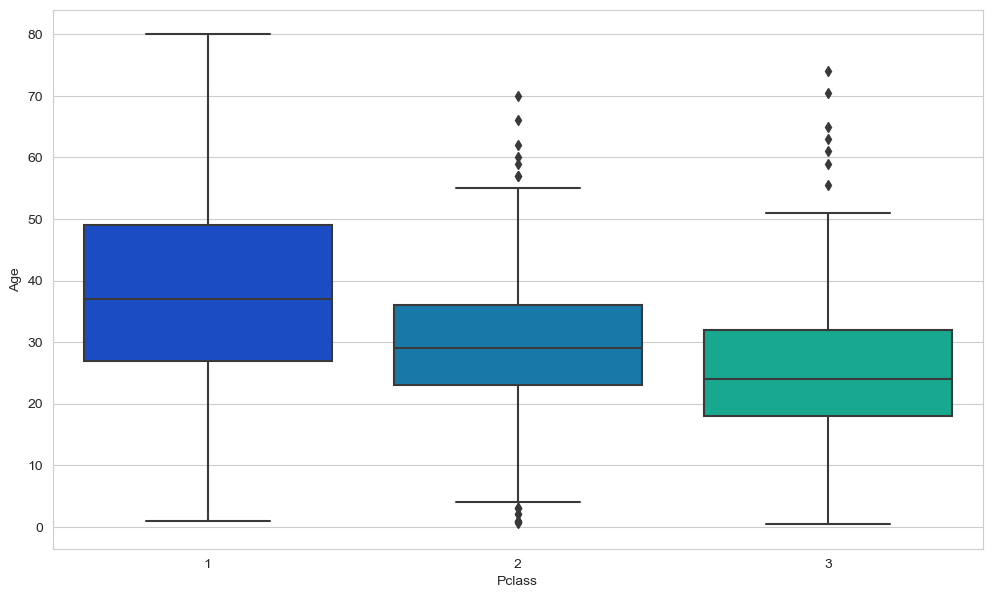

In [24]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=df_train, palette='winter')


<Axes: xlabel='Pclass', ylabel='Age'>

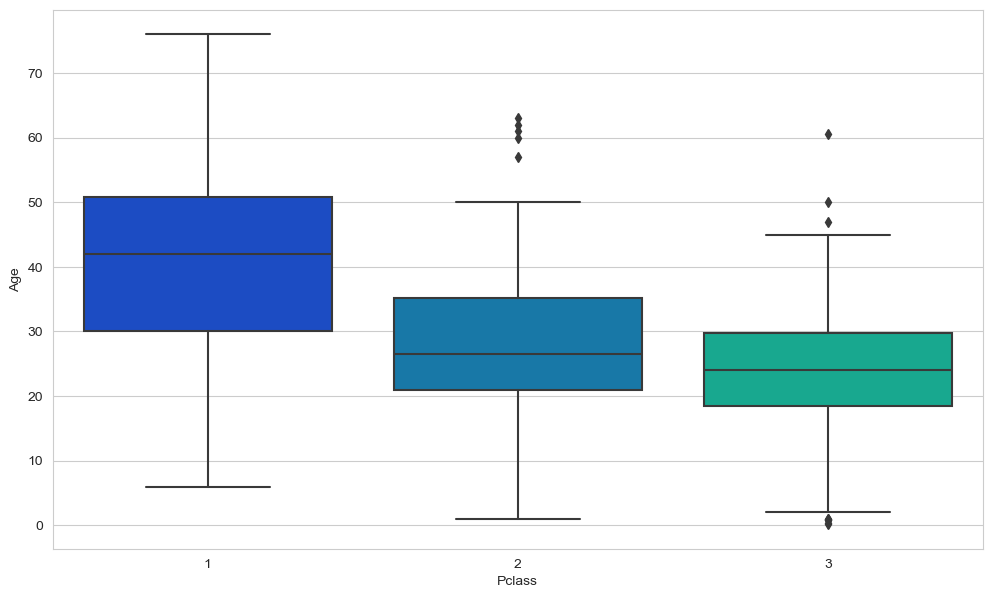

In [25]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=df_test,palette='winter')

___
## Data Cleaning

I find it a waste of information to just drop the "Age" and "Cabin" columns with a lot of missing data. Below I impute the ages of passengers where  age is unknown, based on the median age of passengers in their class.

I convert the "Cabin" column to a new column, named "CabinKnown" with categorical information on whether the cabin information is known (1) or not (0). I chose this over dropping the column, because there might be some useful information for the predictions. For example: could it be that the cabin information is more often known for survivors than for deceased passengers, because the survivors were able to provide this information? In the countplot I created below, there does seem to be a relationship between CabinKnown and Survival in the train data.
After the conversion I drop the original "Cabin" column, as I won't use any of the other information from that column for now.

Finally, I drop the missing data from the "Embarked" and "Fare" columns.

In [26]:
df_train["Age"] = df_train.groupby("Pclass")["Age"].transform(lambda x: x.fillna(x.median()))

In [27]:
df_test["Age"] = df_test.groupby("Pclass")["Age"].transform(lambda x: x.fillna(x.median()))

In [28]:
def convert_cabin(cols):
    if pd.isnull(cols):
        return 0
    else:
        return 1

In [29]:
df_train['CabinKnown'] = df_train['Cabin'].apply(convert_cabin)

In [30]:
df_test['CabinKnown'] = df_test['Cabin'].apply(convert_cabin)

In [31]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,CabinKnown
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [32]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,CabinKnown
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0


<Axes: xlabel='CabinKnown', ylabel='count'>

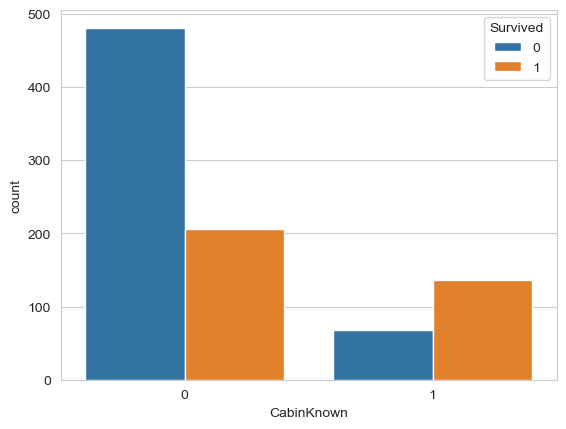

In [33]:
sns.countplot(x='CabinKnown',data=df_train, hue="Survived")

In [34]:
df_train.drop('Cabin',axis=1,inplace=True)
df_test.drop('Cabin',axis=1,inplace=True)

In [35]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,CabinKnown
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0


In [36]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,CabinKnown
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,0


In [37]:
df_train.dropna(inplace=True)

In [38]:
df_test.dropna(inplace=True)

In [39]:
print(df_train.isna().sum())
print(df_test.isna().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
CabinKnown     0
dtype: int64
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
CabinKnown     0
dtype: int64


### Converting Categorical Features 

There are other columns that can be converted into categorical data: the "sex" column and the "embark" column with the use of dummy-variables.
After converting them into new columns, I drop these columns. I also drop the columns "name" and "ticket" as I won't use them in the current analysis.

In [40]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
 11  CabinKnown   889 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 90.3+ KB


In [41]:
sex_train = pd.get_dummies(df_train['Sex'],drop_first=True)
embark_train = pd.get_dummies(df_train['Embarked'],drop_first=True)

In [42]:
sex_test = pd.get_dummies(df_test['Sex'],drop_first=True)
embark_test = pd.get_dummies(df_test['Embarked'],drop_first=True)

In [43]:
df_train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)
df_test.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [44]:
df_train = pd.concat([df_train,sex_train,embark_train],axis=1)
df_test = pd.concat([df_test,sex_test,embark_test],axis=1)

In [45]:
df_train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,CabinKnown,male,Q,S
0,1,0,3,22.0,1,0,7.2500,0,1,0,1
1,2,1,1,38.0,1,0,71.2833,1,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,1,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,1,0,1


In [46]:
df_test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,CabinKnown,male,Q,S
0,892,3,34.5,0,0,7.8292,0,1,1,0
1,893,3,47.0,1,0,7.0000,0,0,0,1
2,894,2,62.0,0,0,9.6875,0,1,1,0
3,895,3,27.0,0,0,8.6625,0,1,0,1
4,896,3,22.0,1,1,12.2875,0,0,0,1


# The Random Forest Model

Below I fit the data to a RandomForestClassifier.

In [47]:
y = df_train["Survived"]
X = df_train.drop(columns=["Survived", "PassengerId"])
X_test = df_test.drop(columns=["PassengerId"])

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X, y)

RandomForestClassifier()

In [50]:
rfc_pred = rfc.predict(X_test)

In [51]:
results = pd.DataFrame({"Passenger ID": df_test["PassengerId"], "Survived": rfc_pred})

In [52]:
results

,Passenger ID,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
